In [1]:
# This source code belongs to paper:
# Facial Expression Recognition Using a Multi-level Convolutional Neural Network

# Hai-Duong Nguyen*, Soonja Yeom**, Il-Seok Oh***, Kyoung-Min Kim****, Soo-Hyung Kim*
# (*) School of Electronics and Computer Engineering, Chonnam National University, South Korea
# (**) School of Engineering and ICT, University of Tasmania, Australia
# (***) Department of Computer Science and Engineering, Chonbuk National University, South Korea
# (****) Department of Electrical and Semiconductor Engineering, Chonnam National University, South Korea

In [2]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Using TensorFlow backend.


In [3]:
n_classes = 7
classes=np.array(('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'))

img_size = 48
# batch_size = 1024
batch_size = 64

current_model = 'fer2013'

final_model_path = current_model + '.h5'

# Other functions

In [4]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [5]:
def int2emo(num):
    if num == 0:
        return 'Angry'
    elif num == 1:
        return 'Disgust'
    elif num == 2:
        return 'Fear'
    elif num == 3:
        return 'Happy'
    elif num == 4:
        return 'Neutral'
    elif num == 5:
        return 'Sad'
    else:
        return 'Surprise'

# Data loading

In [6]:
test_data_x = np.load(current_model + '_test_data_x.npy')
test_data_y_one_hot = np.load(current_model + '_test_data_y_one_hot.npy')
n_test_ins = test_data_x.shape[0]

# MLCNN

In [7]:
BEST_WEIGHT_FILE = './' + current_model + '.hdf5'

print('> loading trained model from ' + BEST_WEIGHT_FILE + '...', end='')
model = load_model(BEST_WEIGHT_FILE)
print('done.')

> loading trained model from ./fer2013.hdf5...done.


In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 48, 48, 1)     0                                            
____________________________________________________________________________________________________
conv_1_1_net_1 (Conv2D)          (None, 48, 48, 64)    640         input[0][0]                      
____________________________________________________________________________________________________
conv_1_1_net_2 (Conv2D)          (None, 48, 48, 64)    640         input[0][0]                      
____________________________________________________________________________________________________
conv_1_1_net_3 (Conv2D)          (None, 48, 48, 64)    640         input[0][0]                      
___________________________________________________________________________________________

# Evaluation

### Confusion matrix

In [9]:
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen.fit(test_data_x)
test_generator = test_datagen.flow(test_data_x, test_data_y_one_hot, batch_size=batch_size, shuffle=False)

y_pred_ = model.predict_generator(generator=test_generator, steps=n_test_ins/batch_size, verbose=1)

C:\Program Files\Anaconda3\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (3589, 48, 48, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


57/56 [==============================] - 4s     


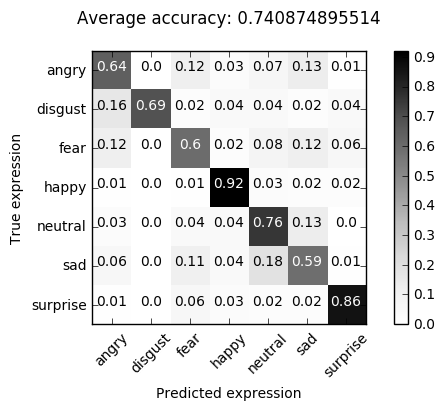

In [10]:
# Predictions
y_pred = np.argmax(y_pred_, axis=1)
# Ground truth
t_te = np.argmax(test_generator.y, axis=1)

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

### Testing with random image

In [11]:
rnd_indx = np.random.randint(0, test_data_x.shape[0])
test_img = test_data_x[rnd_indx, :, :]
test_img = test_img.reshape((1, test_img.shape[0], test_img.shape[1], test_img.shape[2]))

In [12]:
pred_emo = int2emo(y_pred[rnd_indx])
true_emo = int2emo(t_te[rnd_indx])

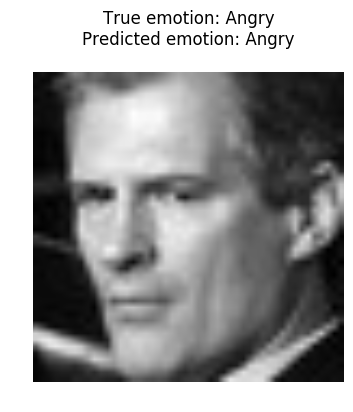

In [13]:
plt.imshow(test_img[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('True emotion: ' + true_emo + '\nPredicted emotion: ' + pred_emo + '\n')
plt.show()